# Reading the Dataset
Download and load the dataset from the following link: https://www.kaggle.com/mirichoi0218/insurance/download

In [100]:
import pandas as pd

df = pd.read_csv('insurance.csv')

print("Shape before any drops:",df.shape)
df.dropna()
print("Shape after any drops:",df.shape)

df.head()

Shape before any drops: (1338, 7)
Shape after any drops: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Preprocessing
Perform any needed pre-processing on the chosen features including:
- Scaling.
- Encoding.
- Dealing with Nan values.
- Normalization.

In [101]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df["smoker"] = encoder.fit_transform(df["smoker"])
df["region"] = encoder.fit_transform(df["region"])
df["sex"] = encoder.fit_transform(df["sex"])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

df = pd.DataFrame(scaled_df, columns = df.columns)

df



,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915,-0.220551
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326,-0.914002
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495,-0.961596
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905,-0.930362


# Feature Selection
Look again at the features in your dataset. Decide if some of the features should be dropped for better clustering.

In [105]:
X = df[["age", "sex", "bmi", "smoker", "charges"]]

X

,age,sex,bmi,smoker,charges
0,-1.438764,-1.010519,-0.453320,1.970587,0.298584
1,-1.509965,0.989591,0.509621,-0.507463,-0.953689
2,-0.797954,0.989591,0.383307,-0.507463,-0.728675
3,-0.441948,0.989591,-1.305531,-0.507463,0.719843
4,-0.513149,0.989591,-0.292556,-0.507463,-0.776802
...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,-0.507463,-0.220551
1334,-1.509965,-1.010519,0.206139,-0.507463,-0.914002
1335,-1.509965,-1.010519,1.014878,-0.507463,-0.961596
1336,-1.296362,-1.010519,-0.797813,-0.507463,-0.930362


In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(X)

scaled_features = pd.DataFrame(scaled_features, columns=X.columns)

scaled_features.head()

,age,sex,bmi,smoker,charges
0,-1.438764,-1.010519,-0.453320,1.970587,0.298584
1,-1.509965,0.989591,0.509621,-0.507463,-0.953689
2,-0.797954,0.989591,0.383307,-0.507463,-0.728675
3,-0.441948,0.989591,-1.305531,-0.507463,0.719843
4,-0.513149,0.989591,-0.292556,-0.507463,-0.776802


# Clustering

Use k-means and Mean-shift to fit your data.

Get optimal k for k-means using the elbow curve method.

Try different bandwidth for the mean-shift clustering.

In [107]:
from sklearn.cluster import KMeans

inertia_values = []
spread = range(1, 26)

for k in spread:
    model = KMeans(n_clusters=k, tol = 0.01, random_state=0)
    model.fit(X)
    inertia_values.append(model.inertia_)

print(inertia_values)

[6690.0, 4514.132431892251, 3588.1819197479217, 2972.9614907241366, 2586.982276855923, 2434.5189049589508, 1986.041611731764, 1784.9515800600648, 1664.5730203888177, 1485.5829903499912, 1339.878424771709, 1296.9167298308016, 1175.866167636696, 1090.4399950893924, 1032.1975518765007, 985.6503751561521, 936.2817813251963, 914.166866567209, 877.6313921969833, 841.6634593015706, 754.6718802786555, 740.7940939831642, 718.1756691424545, 694.5798386799448, 665.6459528907566]


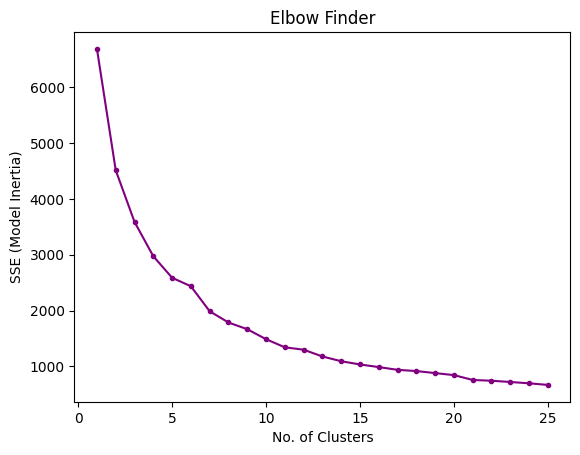

In [ ]:
import matplotlib.pyplot as plt

plt.plot(spread, inertia_values, marker=".", c="purple")
plt.title("Elbow Finder")
plt.xlabel("No. of Clusters")
plt.ylabel("SSE (Model Inertia)")
plt.show()

# approx 8 n_clusters are optimal

In [126]:

from sklearn.cluster import MeanShift

MSModel = MeanShift(bandwidth=0.25)
clusters = MSModel.fit_predict(X)

print(clusters[1:150])



[ 16  48 331  56  21  79   8  47 214  11 110  37 115 349  51  18  58  86
  92  64  14  16 327   2   4 111   5 191 342 133  62 195 136 345  52  39
 356 126 113  59  81  89  46  88 234  38  49  96  90  61  24 168  90  55
 112   5 109 117  81  44  48 197  21 135  15  73  35 308 129 353  20  17
  74  44  12  23  37 107   7  20 278 132 143 177 277 227  28   1  28  38
  28 217  36 156 185  18  86 232 175  46 105 194 158   9 108  15  22  20
 155  12  17  47  61   6 212 221 181  42  70  88  27  15 120  31  23  95
  87 337  45  28 111  54  51  15  59  16  51 161  61 325  48 104 182  82
 185 120  87  54  26]


In [127]:
MSModel = MeanShift(bandwidth=1)
clusters = MSModel.fit_predict(X)

print(clusters[1:150])

[ 2  2 16  2  1  0  1  3 13  2  8  2 15  4  2  0  2 14  4  0  1  2 10  3
  0 13  0 16  4  4  1  1 14  4  2  0  2  4  6  1  1  3  1  3 14 19  1  0
  4  1  1  5  4  0  6  0  4  8 19  3  2 14  1  7  1 15  3  0  5  7  2  0
 14  3 14  1  2 19  0  2  0  4 15  9  5  9  0  0  0 19  0  6  3  9 19  0
 14  5  5  0  2 11  8  1  5  1  2  2  6  3  0  3  1  3 14 14  7  0  1  3
  2  1  6  0  1  7  0 21  3  0 13  0  2  1  1  2  2 15  1 16  2  5 12  5
 19  6  0  0  2]


In [128]:
MSModel = MeanShift(bandwidth=2)
clusters = MSModel.fit_predict(X)

print(clusters[1:150])

[1 1 1 1 0 0 0 1 0 1 3 1 0 2 1 0 1 1 2 0 0 1 3 1 0 0 0 1 2 2 0 0 1 2 1 0 1
 2 2 0 0 1 0 1 1 0 0 0 2 0 0 2 2 0 2 0 2 3 0 1 1 1 0 3 0 0 1 0 2 3 1 0 1 1
 1 0 1 0 0 1 0 2 0 3 2 3 0 0 0 0 0 2 1 3 0 0 1 2 2 0 1 0 3 0 2 0 1 1 2 1 0
 1 0 1 1 1 3 0 0 1 1 0 2 0 0 3 0 3 1 0 0 0 1 0 0 1 1 0 0 1 1 2 1 2 0 2 0 0
 1]


In [129]:
MSModel = MeanShift(bandwidth=3)
clusters = MSModel.fit_predict(X)

print(clusters[1:150])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


The larger the bandwidth, the fewer the clusters there are